In [1]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

Carregando o Dataset de vendas (obtido no Kaggle) e plotando seu cabeçalho.

In [2]:
df = pd.read_csv("archive (1)/sales_1.csv")
df.head()

,Date,SKU,Group,Units_pkg,Avg_price_pkg,Sales_pkg
0,201801,SKU_01,A,13,5,879
1,201801,SKU_02,B,7,7,8
2,201801,SKU_03,B,7,6,197
3,201801,SKU_04,C,4,6,1
4,201801,SKU_05,C,6,8,1


In [3]:
df.describe()

,Date,Units_pkg,Avg_price_pkg,Sales_pkg
count,4138.000000,4138.000000,4138.000000,4138.000000
mean,202015.618173,12.881344,9.138231,335.733446
std,142.616710,22.024843,3.551443,419.834537
min,201801.000000,0.000000,2.000000,0.000000
25%,201905.000000,5.000000,7.000000,65.000000
50%,202008.000000,5.000000,9.000000,180.000000
75%,202111.000000,7.000000,11.000000,436.750000
max,202212.000000,100.000000,26.000000,3364.000000


In [4]:
df.shape

(4138, 6)

Encontrando a linha com record de vendas e visualizando seu conteudo. Podemos observar que o record foi em janeiro de 2018 vendendo 3364 pacotes do produtos SKU_07

In [5]:
df.Sales_pkg.idxmax()

6

In [6]:
df.iloc[6]

Date             201801
SKU              SKU_07
Group                 D
Units_pkg             6
Avg_price_pkg         9
Sales_pkg          3364
Name: 6, dtype: object

Abaixo calculamos qual o produto mais vendido no total, que também foi o SKU_07, vendendo um total de 114243 pacotes desse produto.

In [7]:
mx = [0,0]
for i in set(df.SKU):
    val = df[df.SKU==i].Sales_pkg.sum()
    if val > mx[1]:
        mx[0] = i
        mx[1] = val
mx

['SKU_07', 114243]

Iremos analisar as vendas mensais de 2018, para isso descobrir o index do primeiro mes de 2019. Com esse index em mãos podemos plotar um resumo dos dados ate a linha. 

In [8]:
df[df.Date==201901]

,Date,SKU,Group,Units_pkg,Avg_price_pkg,Sales_pkg
751,201901,SKU_03,B,7,6,6
752,201901,SKU_05,C,6,8,8
753,201901,SKU_53,C,6,8,28
754,201901,SKU_54,C,5,8,34
755,201901,SKU_07,D,6,9,2703
...,...,...,...,...,...,...
811,201901,SKU_68,M,40,8,11
812,201901,SKU_65,M,80,11,44
813,201901,SKU_51,N,100,6,502
814,201901,SKU_52,N,100,5,495


In [9]:
df.loc[:750].describe()

,Date,Units_pkg,Avg_price_pkg,Sales_pkg
count,751.000000,751.000000,751.000000,751.000000
mean,201806.784288,12.083888,8.564581,268.037284
std,3.386061,20.247328,2.817237,403.413745
min,201801.000000,2.000000,3.000000,0.000000
25%,201804.000000,5.000000,7.000000,44.000000
50%,201807.000000,6.000000,8.000000,129.000000
75%,201810.000000,7.000000,11.000000,324.500000
max,201812.000000,100.000000,15.000000,3364.000000


Já com a ideia geral dos dados podemos começar nossa exploração, neste documentos limitaremos ao numero de vendas por mes, mas poderia ser analisado o número de vendas mensais de cada produuto, ou a variança do número de vendas de um produto a cada mês.

In [10]:
l = list()
for i in range(201801, 201813):
    l.append(df[df.Date==i].Sales_pkg.sum())

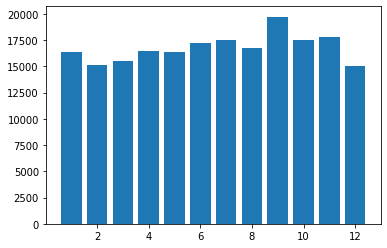

In [11]:
plt.bar(range(1,13),l)
plt.show()

O grafico abaixo traz a variação do número de vendas em 2018 do produto mais vendido encontrado anteriromente.

/tmp/ipykernel_29309/3572556188.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(range(1,13),df.loc[:750][df.SKU==mx[0]].Sales_pkg)


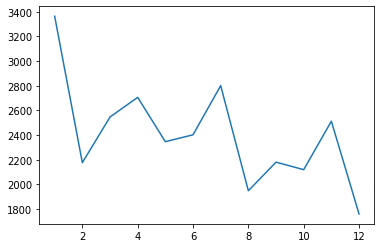

In [12]:
plt.plot(range(1,13),df.loc[:750][df.SKU==mx[0]].Sales_pkg)